In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
pfad = "BIOGRID-ORGANISM-4.4.205.tab3/"

# Herpesvirus

Number of nodes: 7
Number of edges: 4
Largest component: {113010, 119501, 1678239}


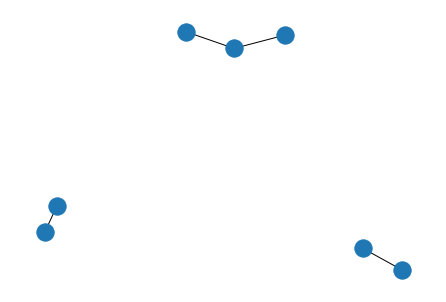

In [ ]:
G = nx.Graph()
data = pd.read_csv(pfad + 'BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.205.tab3.txt', sep="	" )
for index, row in data.iterrows():
    G.add_edge(row['BioGRID ID Interactor A'], row['BioGRID ID Interactor B'])
print('Number of nodes: ' + str(G.number_of_nodes()))
print('Number of edges: ' + str(G.number_of_edges()))
largest_cc = max(nx.connected_components(G), key=len)
print('Largest component: ' + str(largest_cc))
#Plot
nx.draw(G)
plt.draw
plt.show()

## Other organism

In [ ]:
pfad = "BIOGRID-ORGANISM-4.4.205.tab3/"
file_name = input ("Enter the file name (i.e. BIOGRID-ORGANISM-Bos_taurus-4.4.205.tab3.txt): ")
#print(file_name)

Enter the file name (i.e. BIOGRID-ORGANISM-Bos_taurus-4.4.205.tab3.txt): BIOGRID-ORGANISM-Severe_acute_respiratory_syndrome_coronavirus-4.4.205.tab3.txt


In [ ]:
#Read file
data = pd.read_csv(pfad + file_name, sep="	" )
#Now check how many BioGRID IDs and Enrez Genes are saved for both Interactor
counterBioGRID = 0
counterEntrez = 0
for index, row in data.iterrows():
  if row['Entrez Gene Interactor A'] == '-' or row['Entrez Gene Interactor B'] == '-':
    counterEntrez = counterEntrez + 1
  if row['BioGRID ID Interactor A'] == '-' or row['BioGRID ID Interactor B'] == '-':
    counterBioGRID = counterBioGRID +1

print('NO Entrez Genes ID: ' + str(counterEntrez))
print('NO BioGRID ID: ' + str(counterBioGRID))

#Choose the ID type that is available more often
interactor_name = 'Entrez Gene'
if counterBioGRID <= counterEntrez:
  interactor_name = 'BioGRID ID '

NO Entrez Genes ID: 10
NO BioGRID ID: 0


Graph with selfloops and parallel edges


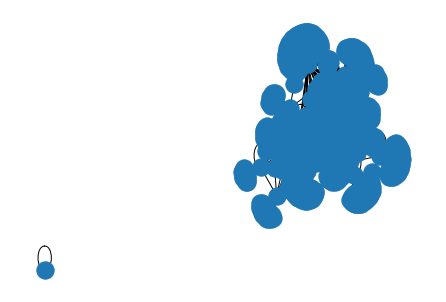

Number of nodes: 1110
Number of edges: 1375


In [ ]:
G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row[interactor_name + 'Interactor A'], row[interactor_name +'Interactor B'])
#Plot
print('Graph with selfloops and parallel edges')
nx.draw(G)
plt.draw
plt.show()
print('Number of nodes: ' + str(G.number_of_nodes()))
print('Number of edges: ' + str(G.number_of_edges()))
#print('Number of edges: ' + str(G.))

# Remove selfloops and parallel edges:

Graph with no selfloops and no parallel edges


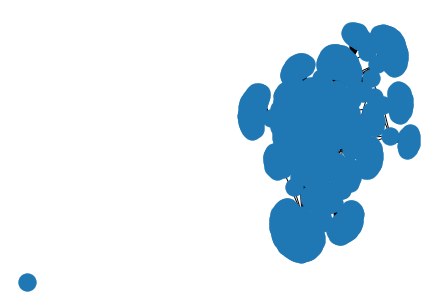

In [ ]:
#remove selfloops
G.remove_edges_from(nx.selfloop_edges(G))
#remove parallel edges: Because we are using a normal undirected Graph it is not 
# possible to have equal multiple edges from one node to another. If we want to 
# have parallel edges we should use nx.MultiDiGraph()
print('Graph with no selfloops and no parallel edges')
nx.draw(G)
plt.draw
plt.show()

# ANALYSIS OF THE HUMAN PROTEIN INTERACTION NETWORK:

In [ ]:
import seaborn as sns
sns.set_context("notebook")

In [ ]:
def interactions_as_pandas(file):
    interactions_dataframe = pd.read_csv(file, sep='\t', engine='python')
    return interactions_dataframe

In [ ]:
interactions = interactions_as_pandas(pfad + "BIOGRID-ORGANISM-Homo_sapiens-4.4.205.tab3.txt")

In [ ]:
interactions.head()

#BioGRID Interaction ID  ... Organism Name Interactor B
0                      103  ...               Homo sapiens
1                      117  ...               Homo sapiens
2                      183  ...               Homo sapiens
3                      278  ...               Homo sapiens
4                      418  ...               Homo sapiens

[5 rows x 37 columns]

In [ ]:
interactions_clean = interactions[['Official Symbol Interactor A', 'Official Symbol Interactor B']]
interactions_clean.head()

Official Symbol Interactor A Official Symbol Interactor B
0                       MAP2K4                         FLNC
1                         MYPN                        ACTN2
2                        ACVR1                         FNTA
3                        GATA2                          PML
4                         RPA2                        STAT3

In [ ]:
# Consctruct the PIN for Homo Sapiens
G_human = nx.Graph()
G_human = nx.from_pandas_edgelist(interactions_clean, 'Official Symbol Interactor A', 'Official Symbol Interactor B')

In [ ]:
# 2.3.1 Largest component
Gcc = G_human.subgraph(sorted(nx.connected_components(G_human), key=len, reverse=True)[0])

whole_network_size = G_human.number_of_nodes()
largest_component_size = Gcc.number_of_nodes()

print('The size of the whole network is', whole_network_size)
print('The size of the largest connected component is', largest_component_size)
print('Therefore, approximately', int(100*largest_component_size/whole_network_size), 'percent of all nodes are in the largest connected component.')

The size of the whole network is 26219
The size of the largest connected component is 26216
Therefore, approximately 99 percent of all nodes are in the largest connected component.


The mean degree of nodes is 56.05332621299969


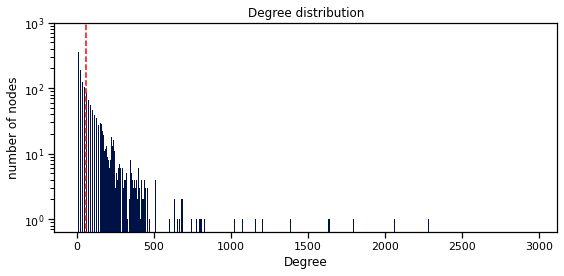

The degree distribution resembles the Erdos-Renyi distribution for large n, which is Poisson.


In [ ]:
# 2.3.2 Degree distribution
meanDegree = 2*Gcc.number_of_edges()/Gcc.number_of_nodes()
print('The mean degree of nodes is', meanDegree)

degree_sequence = sorted([d for n, d in Gcc.degree()], reverse=True)
dmax = max(degree_sequence)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(*np.unique(degree_sequence, return_counts=True),color='#001146')
ax.set_title("Degree distribution")
ax.set_xlabel("Degree")
ax.set_ylabel("number of nodes")
ax.set_yscale('log')
ax.vlines(meanDegree,0,10**4,linestyles='dashed',label='mean degree',color='r')
ax.set_ylim(top=10**3)

fig.tight_layout()

plt.show()

print('The degree distribution resembles the Erdos-Renyi distribution for large n, which is Poisson.')

In [ ]:
# 2.3.3 Centrality measures

# 1 Degree centrality
deg_centrality = nx.degree_centrality(Gcc)
deg_centrality_sorted = sorted(deg_centrality.items(), key = lambda x: x[1], reverse = True)
print('The 20 nodes with highest degree centrality are displayed below:')
print(deg_centrality_sorted[:20])

The 20 nodes with highest degree centrality are displayed below:
[('PLEKHA4', 0.11329391569711998), ('KIAA1429', 0.11119588022124739), ('TRIM25', 0.09410642761777609), ('APP', 0.08735456799542247), ('ESR2', 0.08708754529849323), ('ESR1', 0.08613389280946024), ('TP53', 0.07865725729544155), ('MYC', 0.07610146862483312), ('NTRK1', 0.0749189395384322), ('ELAVL1', 0.07465191684150296), ('KRAS', 0.06942590120160214), ('HNRNPL', 0.06904444020598895), ('M', 0.0687774175090597), ('KIF14', 0.06851039481213046), ('DDX58', 0.06660308983406447), ('UBC', 0.06656494373450315), ('EGFR', 0.06255960328056456), ('HIST1H4A', 0.06229258058363533), ('ORF7b', 0.0608811748998665), ('CIT', 0.05447263017356476)]


In [ ]:
# 2 Betweenness centrality 
# important: for shorter runtime we sampled the network for 50 nodes
bet_centrality = nx.betweenness_centrality(Gcc, normalized = True, endpoints = False, k = 50)
bet_centrality_sorted = sorted(bet_centrality.items(), key = lambda x: x[1], reverse = True)
print('The 20 nodes with highest betweenness centrality are displayed below:')
print(bet_centrality_sorted[:20])

The 20 nodes with highest betweenness centrality are displayed below:
[('NR3C1', 0.10141806601008926), ('KIAA1429', 0.051703031297174615), ('UBC', 0.04236827896385348), ('HNRNPL', 0.03265545871023961), ('TP53', 0.03135768115068968), ('TRIM25', 0.027969110256544288), ('BRCA1', 0.024901331000302843), ('HIST1H1A', 0.024103500435322646), ('RAD23A', 0.023202432524963335), ('GRB2', 0.021367148514341478), ('ELAVL1', 0.02099910824340738), ('ETAA1', 0.02086066708886886), ('APP', 0.020834872441479257), ('PLEKHA4', 0.02061656612560345), ('SMARCAD1', 0.02006120955763663), ('SMNDC1', 0.02004009625604065), ('TRIM9', 0.019578513767346168), ('STUB1', 0.01854284077213783), ('KRAS', 0.01695144728565486), ('OTUD4', 0.0127490172119255)]


In [ ]:
# Compare proteins that are mentioned in both centrality measures 
# (for 50 highest scores).
deg_proteins = []
for record in deg_centrality_sorted[:50]:
    deg_proteins.append(record[0])
bet_proteins = []
for record in bet_centrality_sorted[:50]:
    bet_proteins.append(record[0])
hubs = list(set(deg_proteins).intersection(bet_proteins))
print('Proteins present in both centrality measures are the hubs candidates. There are such 28 proteins:\n', hubs)

Proteins present in both centrality measures are the hubs candidates. There are such 28 proteins:
 ['UBC', 'DDX39A', 'CUL3', 'BRCA1', 'KIF14', 'PLEKHA4', 'DDX58', 'ELAVL1', 'APP', 'MOV10', 'HNRNPL', 'ESR1', 'HIST1H4A', 'HSPA8', 'ESR2', 'TRIM25', 'TP53', 'EGLN3', 'TRIM28', 'CIT', 'HNRNPH1', 'EGFR', 'APEX1', 'KRAS', 'NR3C1', 'M', 'KIAA1429']


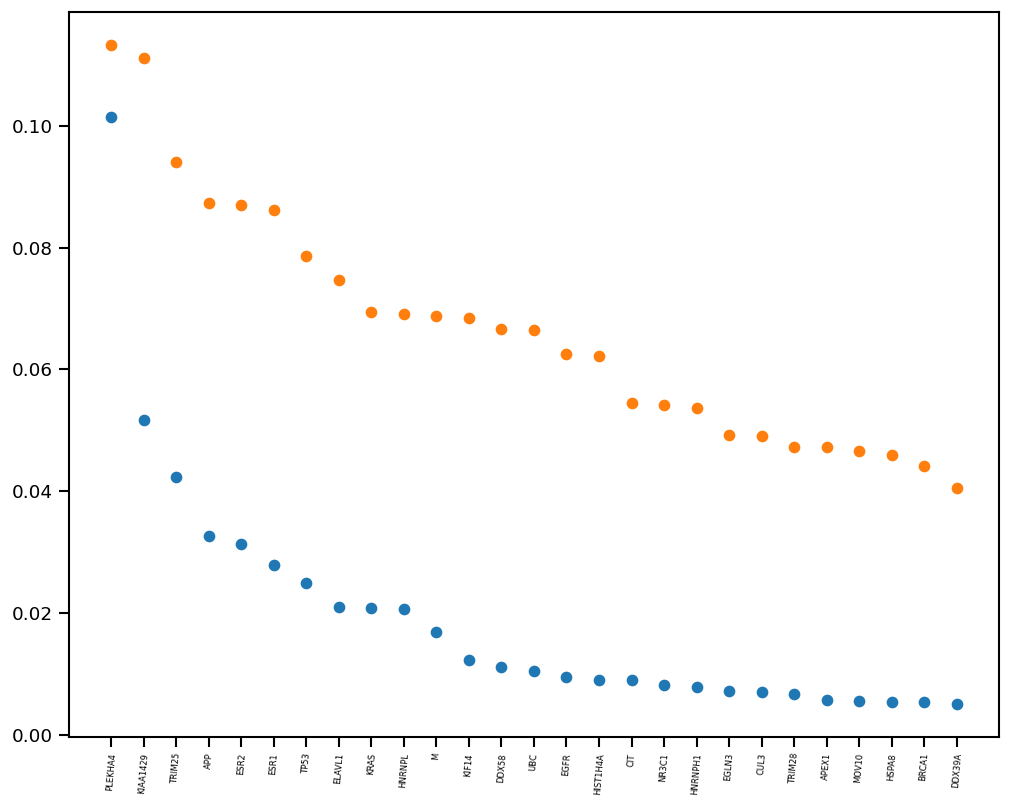

The Pearsons correlation is:  0.882486744907499


In [ ]:
# Scatter plot for proteins centralities

deg = []
bet = []
for record in deg_centrality_sorted[:50]:
    if record[0] in hubs:
        deg.append(record)
    else:
        continue
for record in bet_centrality_sorted[:50]:
    if record[0] in hubs:
        bet.append(record)
    else:
        continue
        
sorted(deg, key = lambda x: x[1])
sorted(bet, key = lambda x: x[1])

deg_values_toplot = [record[1] for record in deg]
prot_names = [record[0] for record in deg]
bet_values_toplot = [record[1] for record in bet]

from matplotlib.pyplot import figure

figure(figsize = (10, 8), dpi = 120)
plt.scatter(prot_names, bet_values_toplot)
plt.xticks(prot_names, rotation = 85, fontsize = 5)
#plt.yticks(bet_values_toplot, fontsize = 5)
plt.scatter(prot_names, deg_values_toplot)
plt.xticks(prot_names, rotation = 85, fontsize = 5)
plt.show()

# Computing the Pearson's correlation
corr = np.corrcoef(deg_values_toplot, bet_values_toplot)
print('The Pearsons correlation is: ', corr[0][1])

In [ ]:
print(Gcc)

Graph with 26216 nodes and 734747 edges


In [ ]:
# 2.3.4 Clustering coefficient

# The main protein interactions network
clust_coeff_Gcc_all = nx.clustering(Gcc).values()
clust_coeff_Gcc = sum(clust_coeff_Gcc_all) / len(clust_coeff_Gcc_all)
print('The clustering coefficient for our protein interactions network is: ', clust_coeff_Gcc)

print('Main PIN finished. Moving to ER network.')

# Random similar Erdos-Renyi graph
ER = nx.erdos_renyi_graph(25000, 0.00224213304)
clust_coeff_ER_all = nx.clustering(ER).values()
clust_coeff_ER = sum(clust_coeff_ER_all) / len(clust_coeff_ER_all)
print('The clustering coefficient for the ER network is: ', clust_coeff_ER)


print('ER finished. Moving to lattice.')

Lattice = nx.grid_2d_graph(50, 500)
clust_coeff_lattice_all = nx.clustering(Lattice).values()
clust_coeff_lattice = sum(clust_coeff_lattice_all) / len(clust_coeff_lattice_all)
print('The clustering coefficient for the lattice is: ', clust_coeff_lattice)

The clustering coefficient for our protein interactions network is:  0.1073497738958973
Main PIN finished. Moving to ER network.
The clustering coefficient for the ER network is:  0.002225284491692023
ER finished. Moving to lattice.
The clustering coefficient for the lattice is:  0.0


In [ ]:
# 2.4 Average path lengths

import random


def subsample_average_shortest_path_length(network, n_pairs_nodes):
    assert 0 < n_pairs_nodes < 2 * len(network)
    edges_list = list(network.edges())
    random.shuffle(edges_list)
    sample_pairs = sample(edges_list, n_pairs_nodes)
    sample_nodes = list(set(sum(sample_pairs, ())))
    sampled_network = nx.Graph()
    sampled_network.add_nodes_from(sample_nodes)
    sampled_network.add_edges_from(sample_pairs)
    if len(list(nx.connected_components(sampled_network))) > 1:
        avgs = []
        components = [sampled_network.subgraph(c).copy() for c in nx.connected_components(sampled_network)]
        for component in components:
            avgs.append(nx.average_shortest_path_length(component))
        #print(len(avgs), avgs)
        return sum(avgs) / len(avgs)
    else:
        return nx.average_shortest_path_length(sampled_network)

In [ ]:
print('Average shortest path length for our main PIN is: ', subsample_average_shortest_path_length(Gcc, 500))
print('Average shortest path length for the ER is: ', subsample_average_shortest_path_length(ER, 500))
print('Average shortest path length for the lattice is: ', subsample_average_shortest_path_length(Lattice, 500))

In [ ]:
Gcc.number_of_edges()

734747

# Community detection on the HOMO SAPIENS network



In [1]:
## Computing the communities with greedy modularity algorithm 
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_human)

## Get the distribution of the community sizes
communities_size = []
for element in communities : 
  communities_size.append(len(element))

plt.figure()
plt.hist(communities_size)
plt.xlabel('Community sizes')
plt.show()
plt.savefig('commuities_distribution.png')

NameError: ignored

#GENE ONTOLOGY ENRICHMENT ANALYSIS

This was done using the Gene Ontology website. Results are in the report
